# Biodiversity in National Parks

[National Parks](https://www.researchgate.net/publication/293218641_National_Parks_Biodiversity_Conservation_and_Tourism)(NPs) are mainly designed to protect the remaining "wilderness" of a given country and have primarily focused on the conservation of extraordinary areas or emblematic species 

This project interpret data from the National Parks Service about endangered species in different parks. will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered.
The Datasets consist of two tables, observations and species_info.

The **observations** table has three columns:
- `scientific_name`: The scientific name for the species

- `park_name`: The park name that has the spec

- `observations`: The number of observations in the past 7 days

and the **species_info table** has four columns:
- `category`: The category of the species

- `scientific_name`:The scientific name for the species

- `common_names`: The common name of the species

- `conservation_status`: The conservations status of the species in the park


**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com)

### Questions:
- What's the relationship between conservation status and category
- what's the percentages between parks and conservation status
- Which park with the most number of observations
- What is the category that has the most number of Conserved species


## Import Python Libraries

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline

## Load The data 

In [301]:
observations = pd.read_csv('observations.csv')
species_info= pd.read_csv('species_info.csv')

## Assess

In [302]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [303]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [304]:
observations.park_name.value_counts()

Bryce National Park                    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
Great Smoky Mountains National Park    5824
Name: park_name, dtype: int64

In [305]:
sum(observations.duplicated())

15

In [306]:
print(f"number of observations:{observations.observations.sum()}")

number of observations:3314739


In [307]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [308]:
species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [309]:
species_info.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

The **conservation_status** column has 4 different values: Species of Concern, Endangered, Threatened, In Recovery where every word refers to the statues of the species conservation in the park:
- Endangered: Any species which is in danger of extinction throughout all or a significant portion of its range
- Threatened: Any species which is likely to become an endangered species within the foreseeable future throughout all or a significant portion of its range 
- Species of Concern: A species of special concern is any species of fish or wildlife that does not meet the criteria of an endangered or threatened species but is particularly vulnerable, and could easily become, an endangered, threatened, or extirpated species due to restricted distribution
- In Recovery: A species the is in recovery and must be monitored for a period of not less than 5 years to ensure that they do not again become threatened or endangered

In [310]:
species_info.category.value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

In [311]:
sum(species_info.duplicated())

0

## Issues

- In the species_info table, the common_names column has more than one observation in each row
- In the species_info table, the conservation_status column has NaN values for the species without a conservation
- Observations table has duplicates

## Fix

##### Define

- Replace the NaN values in the conservation_status table with  "Not Conserved"

##### Code

In [312]:
species_info.conservation_status = species_info.conservation_status.fillna('Not Conserved')

#####  Test

In [313]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Conserved
1,Mammal,Bos bison,"American Bison, Bison",Not Conserved
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not Conserved
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not Conserved
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not Conserved


In [314]:
species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB


##### Define

fix the common_names column so it has one observation in each row then drop duplicates.

##### Code

In [315]:
common_names=species_info.assign(common_names=species_info['common_names'].str.split(',')).explode("common_names").drop_duplicates()[['common_names','scientific_name']]

In [316]:
# Remove common names from the species info table
species_info.drop('common_names',axis=1,inplace=True)

##### We have to recheck if species_info has any duplicates now

In [317]:
sum(species_info.duplicated())

281

##### Drop species_info duplicates

In [318]:
species_info.drop_duplicates(inplace=True)

#####  Test

In [319]:
common_names.head()

,common_names,scientific_name
0,Gapper's Red-Backed Vole,Clethrionomys gapperi gapperi
1,American Bison,Bos bison
1,Bison,Bos bison
2,Aurochs,Bos taurus
2,Aurochs,Bos taurus


In [320]:
common_names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 5823
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   common_names     9000 non-null   object
 1   scientific_name  9000 non-null   object
dtypes: object(2)
memory usage: 210.9+ KB


In [321]:
species_info.head()

,category,scientific_name,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Not Conserved
1,Mammal,Bos bison,Not Conserved
2,Mammal,Bos taurus,Not Conserved
3,Mammal,Ovis aries,Not Conserved
4,Mammal,Cervus elaphus,Not Conserved


In [322]:
species_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5543 entries, 0 to 5823
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5543 non-null   object
 1   scientific_name      5543 non-null   object
 2   conservation_status  5543 non-null   object
dtypes: object(3)
memory usage: 173.2+ KB


In [323]:
sum(species_info.duplicated())

0

##### Define

Remove duplicates from the observations table

##### Code

In [324]:
observations.drop_duplicates(inplace=True)

##### Test

In [325]:
sum(observations.duplicated())

0

In [326]:
 observations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23281 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23281 non-null  object
 1   park_name        23281 non-null  object
 2   observations     23281 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 727.5+ KB


## Analysis

To obtain a table that has the most variables for each species, we will  merge the observation and species_info tables into one table named **parks_species** to analyze.

In [352]:
parks_species=pd.merge(observations,species_info, on="scientific_name")

In [353]:
parks_species.sort_values('observations',ascending=False)

,scientific_name,park_name,observations,category,conservation_status
10029,Lycopodium tristachyum,Yellowstone National Park,321,Vascular Plant,Not Conserved
4657,Castilleja miniata,Yellowstone National Park,317,Vascular Plant,Not Conserved
2825,Cryptantha fendleri,Yellowstone National Park,316,Vascular Plant,Not Conserved
19974,Dracocephalum parviflorum,Yellowstone National Park,316,Vascular Plant,Not Conserved
18119,Bidens tripartita,Yellowstone National Park,314,Vascular Plant,Not Conserved
...,...,...,...,...,...
1002,Sambucus mexicana,Great Smoky Mountains National Park,12,Vascular Plant,Not Conserved
19379,Strix occidentalis,Great Smoky Mountains National Park,11,Bird,Not Conserved
2067,Rana sierrae,Great Smoky Mountains National Park,11,Amphibian,Endangered
5158,Collomia tinctoria,Great Smoky Mountains National Park,10,Vascular Plant,Not Conserved


In [354]:
parks_species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23301 entries, 0 to 23300
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      23301 non-null  object
 1   park_name            23301 non-null  object
 2   observations         23301 non-null  int64 
 3   category             23301 non-null  object
 4   conservation_status  23301 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [355]:
parks_species.conservation_status.value_counts()

Not Conserved         22521
Species of Concern      644
Endangered               68
Threatened               44
In Recovery              24
Name: conservation_status, dtype: int64

### Records Relationships

In [356]:
parks_name_crosstab = pd.crosstab(parks_species.park_name, parks_species.conservation_status)
parks_name_crosstab

conservation_status,Endangered,In Recovery,Not Conserved,Species of Concern,Threatened
park_name,,,,,
Bryce National Park,17,6,5633,161,11
Great Smoky Mountains National Park,17,6,5628,161,11
Yellowstone National Park,17,6,5629,161,11
Yosemite National Park,17,6,5631,161,11


In [357]:
pd.crosstab(parks_species.category, parks_species.conservation_status)

conservation_status,Endangered,In Recovery,Not Conserved,Species of Concern,Threatened
category,,,,,
Amphibian,4,0,292,16,8
Bird,16,12,1767,288,0
Fish,12,0,468,16,20
Mammal,32,12,703,112,8
Nonvascular Plant,0,0,1312,20,0
Reptile,0,0,296,20,0
Vascular Plant,4,0,17683,172,8


In [358]:
pd.crosstab(parks_species.category, parks_species.conservation_status,normalize=True).sort_values('Endangered',ascending=False)

conservation_status,Endangered,In Recovery,Not Conserved,Species of Concern,Threatened
category,,,,,
Mammal,0.001373,0.000515,0.030170,0.004807,0.000343
Bird,0.000687,0.000515,0.075834,0.012360,0.000000
Fish,0.000515,0.000000,0.020085,0.000687,0.000858
Amphibian,0.000172,0.000000,0.012532,0.000687,0.000343
Vascular Plant,0.000172,0.000000,0.758894,0.007382,0.000343
Nonvascular Plant,0.000000,0.000000,0.056307,0.000858,0.000000
Reptile,0.000000,0.000000,0.012703,0.000858,0.000000


In [351]:
category_crosstab = pd.crosstab(parks_species.category, parks_species.conservation_status)
category_crosstab

conservation_status,Endangered,In Recovery,Not Conserved,Species of Concern,Threatened
category,,,,,
Amphibian,4,0,292,16,8
Bird,16,12,1767,288,0
Fish,12,0,468,16,20
Mammal,32,12,703,112,8
Nonvascular Plant,0,0,1312,20,0
Reptile,0,0,296,20,0
Vascular Plant,4,0,17683,172,8


In [347]:
parks_species.groupby(['park_name']).sum().sort_values('observations',ascending=False)

,observations
park_name,
Yellowstone National Park,1443016
Yosemite National Park,863209
Bryce National Park,576195
Great Smoky Mountains National Park,431537


In [348]:
parks_species.groupby(['category']).sum().sort_values('observations',ascending=False)

,observations
category,
Vascular Plant,2553291
Bird,292578
Nonvascular Plant,190653
Mammal,117155
Fish,71631
Reptile,44678
Amphibian,43971


## Visualizations

C:\Users\yazan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


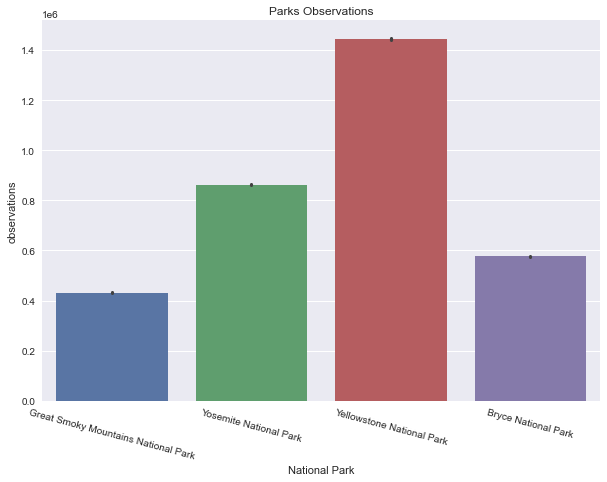

In [346]:
plt.style.use('seaborn')
plt.style.use('seaborn-notebook')
figure(figsize=(10,7))
sns.barplot(parks_species.park_name,parks_species.observations,estimator=np.sum);
plt.title('Parks Observations')
plt.xlabel('National Park')
plt.xticks(rotation=-15);

Yellowstone National Park has the highest total number of observations

C:\Users\yazan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


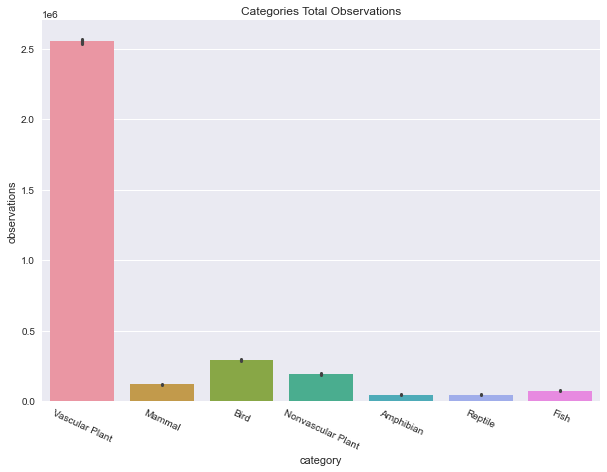

In [344]:
figure(figsize=(10,7))
sns.barplot(parks_species.category,parks_species.observations, estimator=np.sum);
plt.title('Categories Total Observations')
plt.xticks(rotation=-25);

Vascular Plants has the highest number of observations

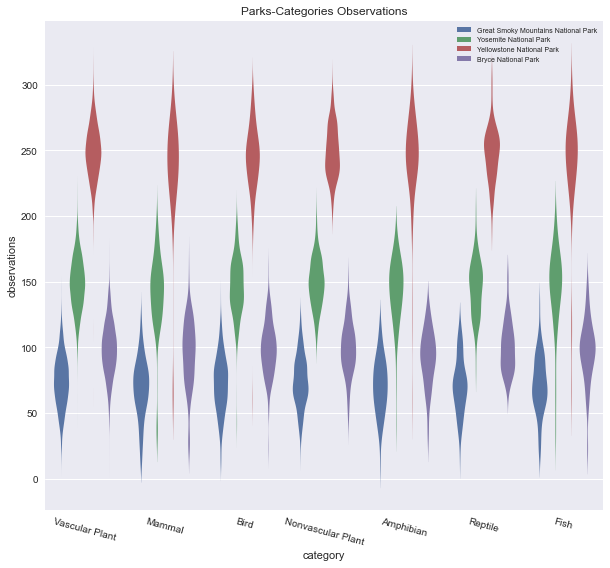

In [339]:
figure(figsize=(10, 9))
sns.violinplot(data=parks_species, x="category", y="observations",hue="park_name",linewidth=0, inner="quart")
plt.legend( prop={"size":7})
plt.title('Parks-Categories Observations')
plt.xticks(rotation=-15);

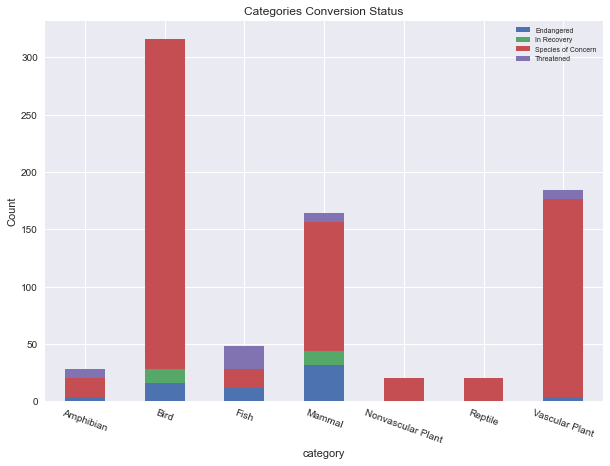

In [343]:
category_crosstab.drop('Not Conserved',axis=1).plot(kind='bar', stacked=True, rot=-20,figsize=(10,7))
plt.legend( prop={"size":7})
plt.ylabel('Count')
plt.title('Categories Conversion Status');

## Conclusion

- The category with the most number and percentage of endangered and in recovery species is mammals
- The category with the most species of concern numbers and percentage is birds
- The category with the most number and percentage of threatened species is fish
- Vascular plants category has the highest number of observations
- Yellowstone National Park has the highest number of observations
- The conservation status distribution is equal for each park
- Most of species are not a part of conservation

## References 

- [National Parks: Biodiversity, Conservation and Tourism](https://www.researchgate.net/publication/293218641_National_Parks_Biodiversity_Conservation_and_Tourism)
- [U.S fish and wildlife service](https://www.fws.gov/pacific/ecoservices/endangered/classification/index.html)
- [Inland fisheries & wildlife](https://www.maine.gov/ifw/fish-wildlife/wildlife/endangered-threatened-species/special-concern.html)
